# ABOUT ADEASE & PROBLEM STATEMENT

**Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.
You are working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.**

# IMPORTING LIBRARAIES AND DOWNLOADING DATASET

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')


In [ ]:
!gdown https://drive.google.com/uc?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl

Downloading...
From (original): https://drive.google.com/uc?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl
From (redirected): https://drive.google.com/uc?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl&confirm=t&uuid=f8cdd566-6be5-449b-b0a5-81a44d9eb9e0
To: /content/train_1.csv
100% 278M/278M [00:05<00:00, 49.5MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE


Downloading...
From: https://drive.google.com/uc?id=19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE
To: /content/Exog_Campaign_eng
100% 1.10k/1.10k [00:00<00:00, 4.00MB/s]


In [ ]:
train= pd.read_csv('train_1.csv')


In [ ]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
exog = pd.read_csv('/content/Exog_Campaign_eng')

In [ ]:
exog.head()

,Exog
0,0
1,0
2,0
3,0
4,0


**We have 18 months of data.**

In [ ]:
# creating copy of data and dropping the duplicate rows

train = train.copy(deep = True)
train.drop_duplicates(keep='last', inplace = True)

In [ ]:
train.shape

(145063, 551)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [ ]:
train.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


In [ ]:
train.isnull().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

In [ ]:
exog.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [ ]:
exog.shape

(550, 1)

In [ ]:
exog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exog    550 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB


In [ ]:
exog.describe()

,Exog
count,550.000000
mean,0.098182
std,0.297831
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
exog.isnull().sum()

Exog    0
dtype: int64

In [ ]:
exog.value_counts()

Exog
0       496
1        54
Name: count, dtype: int64

# CHECKING FOR NULLS IN THE DATA

In [ ]:
train.isnull().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

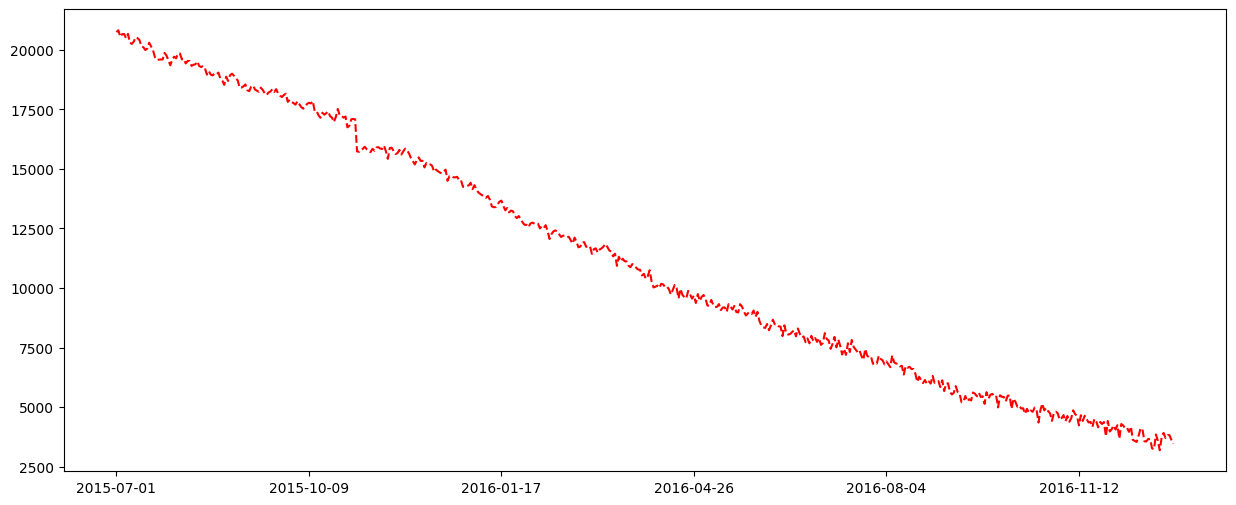

In [ ]:
# plotting the graph for nulls

plt.figure(figsize=(15,6))
train.iloc[:, 1: ].isnull().sum().plot(color='red', linestyle='dashed')
plt.show()

**The number of nulls for more recent data is less.**

**It may happen as more webpages have been developed over time, so for those pages there are nulls in the previous years.**

**We will drop the rows having more than 300 null values and will replace the remaining null values with 0.**

In [ ]:
# dropping the rows having more than 300 nulls and filling the rest with 0

train.dropna(thresh = 300, inplace = True)
train.fillna(0, inplace = True)

In [ ]:
train.isnull().sum()

Page          0
2015-07-01    0
2015-07-02    0
2015-07-03    0
2015-07-04    0
             ..
2016-12-27    0
2016-12-28    0
2016-12-29    0
2016-12-30    0
2016-12-31    0
Length: 551, dtype: int64

**There are no more nulls left in the data.**

# FEATURE ENGINEERING

**EXTRACT LANGUAGE, ACCESS TYPE AND ACCESS ORIGIN FROM PAGE USING REGEX**

In [ ]:
# extracting language using regex

def get_language(name):
    if len(re.findall(r'_(.{2}).wikipedia.org_', str(name))) == 1:
        return re.findall(r'_(.{2}).wikipedia.org_', name)[0]
    else: return 'Unknown_language'


train['language'] = train['Page'].apply(get_language)


language_dict ={'de':'German',
                'en':'English',
                'es': 'Spanish',
                'fr': 'French',
                'ja': 'Japenese' ,
                'ru': 'Russian',
                'zh': 'Chinese',
                'Unknown_language': 'Unknown_language'}

train['language'] = train['language'].map(language_dict)

In [ ]:
# Extracting Access Type from Page

def get_access_type(name):
    if len(re.findall(r'all-access|mobile-web|desktop', str(name))) == 1 :
        return re.findall(r'all-access|mobile-web|desktop', name)[0]
    else: return 'No Access_type'

train['access_type'] = train['Page'].apply(get_access_type)

In [ ]:
# Extracting Access Origin from Page

def get_access_origin(name):
    if len(re.findall(r'[ai].org_(.*)_(.*)$', str(name))) == 1 :
        return re.findall(r'[ai].org_(.*)_(.*)$', name)[0][1]
    else: return 'No Access_origin'

train['access_origin'] = train['Page'].apply(get_access_origin)

**VISUALIZING LANGUAGE, ACCESS TYPE & ACCESS ORIGIN**

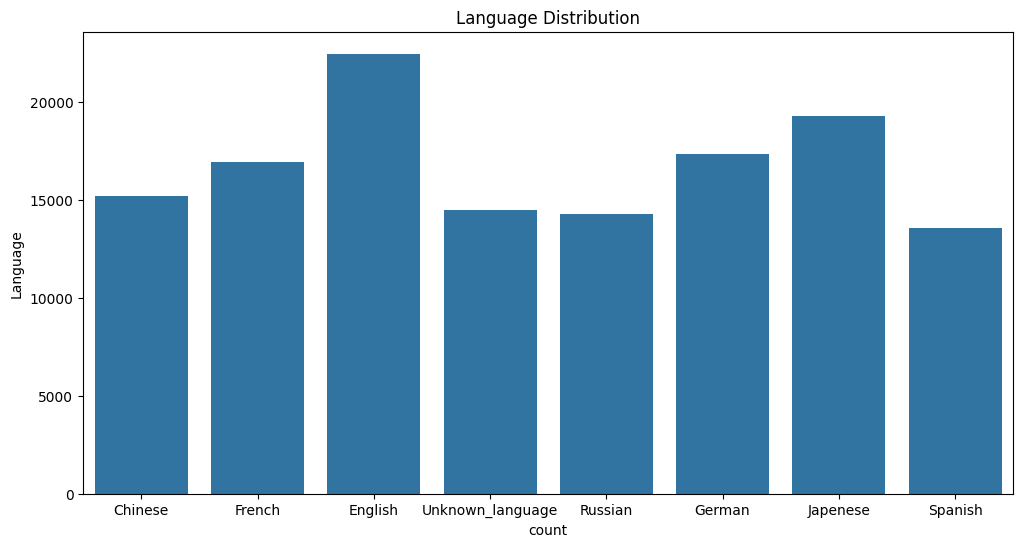

In [ ]:
#  distribution of languages


plt.figure(figsize=(12, 6))
sns.countplot(x= 'language' , data=train)
plt.title('Language Distribution')
plt.xlabel('count')
plt.ylabel('Language')
plt.title('Language Distribution')
plt.show()

**The highest number of webpages are in English followed by Japanese, German and French.**

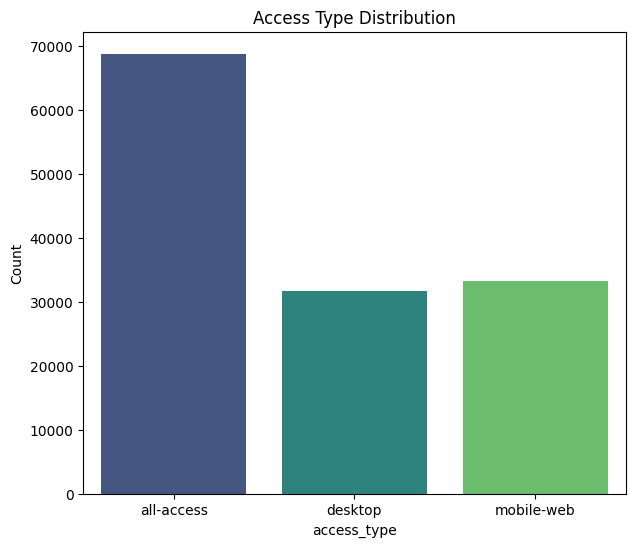

In [ ]:
# distribution of access type


var = 'access_type'
counts = train[var].value_counts()

plt.figure(figsize=(7, 6))
sns.countplot(x=var, data=train, palette='viridis')
plt.title(f'{var} Distribution', fontsize=15, fontweight='bold')
plt.xlabel(var)
plt.ylabel('Count')
plt.title('Access Type Distribution')
plt.show()


**The maximum number of access type is all-access.**

**Mobile-access is a bit more than desktop-access type.**

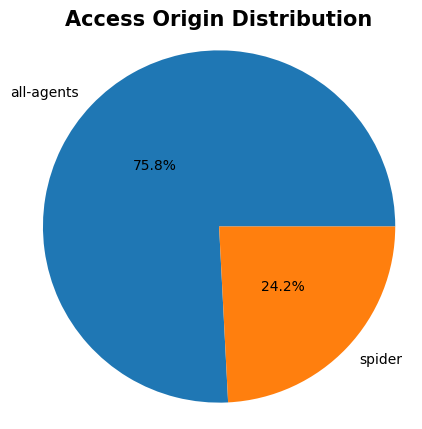

In [ ]:
#Distribution of Access Origin

var = 'access_origin'
x = train[var].value_counts().values
y = train[var].value_counts().index

plt.figure(figsize=(5,5))
plt.pie(x, labels = y, center=(0, 0), radius=1,  autopct='%1.1f%%', pctdistance=0.5)
plt.title('Access Origin Distribution', fontsize = 15, fontweight = 'bold')
plt.axis('equal')
plt.show()

**Spider has 24.2% of all Access Origin.**

**Rest have all-agent Access Origin.**



# DATA PRE-PROCESSING

**FINDING MEAN PAGE VISIT PER LANGUAGE**

In [ ]:
# creating a dataframe for mean page visit for each language

data_language = pd.DataFrame()

numeric_data = train.select_dtypes(include=[float, int])
numeric_data['language'] = train['language']

data_language = numeric_data.groupby('language').mean().transpose()

data_language.drop(['Unknown_language'], inplace = True, axis = 1)
data_language.reset_index(inplace = True)
data_language.set_index('index', inplace = True)
print(data_language)

language       Chinese      English      French       German     Japenese  \
index                                                                       
2015-07-01  272.498521  3767.328604  499.092872   763.765926   614.637160   
2015-07-02  272.906778  3755.158765  502.297852   753.362861   705.813216   
2015-07-03  271.097167  3565.225696  483.007553   723.074415   637.451671   
2015-07-04  273.712379  3711.782932  516.275785   663.537323   800.897435   
2015-07-05  291.977713  3833.433025  506.871666   771.358657   768.352319   
...                ...          ...         ...          ...          ...   
2016-12-27  363.066991  6314.335275  840.590217  1119.596936   808.541436   
2016-12-28  369.049701  6108.874144  783.585379  1062.284069   807.430163   
2016-12-29  340.526330  6518.058525  763.209169  1033.939062   883.752786   
2016-12-30  342.745316  5401.792360  710.502773   981.786430   979.278777   
2016-12-31  352.184275  5280.643467  654.060656   937.842875  1228.720808   

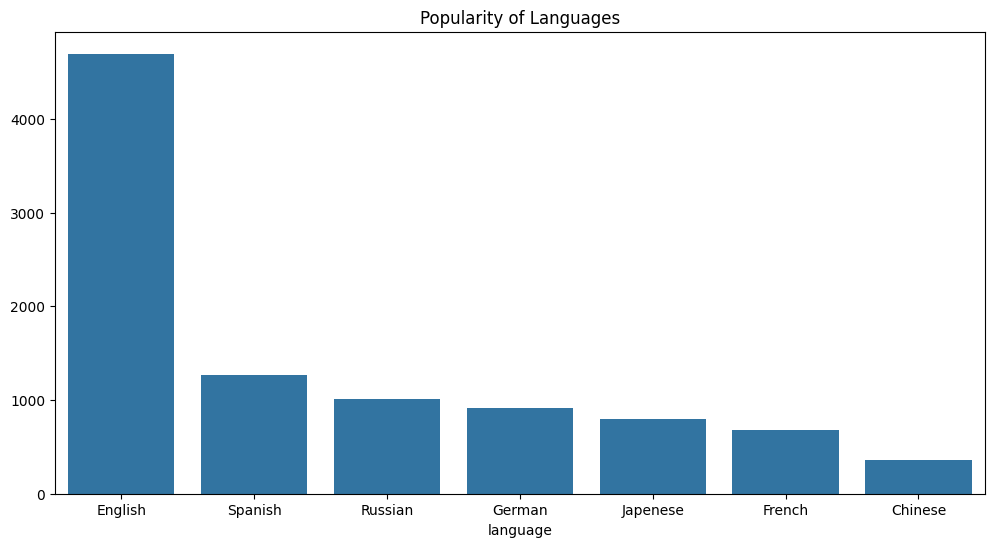

In [ ]:
# Distribution of languages by popularity

x = data_language.mean().sort_values(ascending = False).index
y = data_language.mean().sort_values(ascending = False).values

plt.figure(figsize=(12, 6))
sns.barplot(x=x,y=y)
plt.title(f'Popularity of Languages')
plt.show()

**The most visited pages are in English followed by Spanish, Russian and German.**

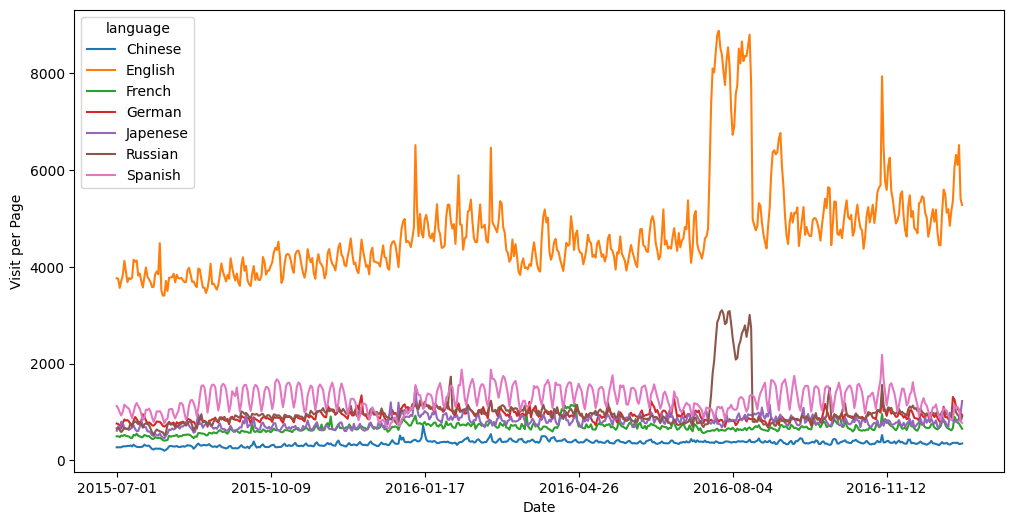

In [ ]:
# Distribution of number of visits per page

data_language.plot(label = data_language.columns,  figsize=(12, 6))
plt.xlabel("Date")
plt.ylabel("Visit per Page")
plt.show()

**The number of page visits is maximum in English. It is roughly uniform with a spike in between.**

# Stationary Check using DICKEY FULLER TEST


Null Hypothesis: The series is non-stationary.

Alternate Hypothesis: The series is stationary.

Significance level = 0.05
If p_value < 0.05 (alpha) is less than the critical value, then we can reject the null hypothesis (the series is stationary)

In [ ]:
# function for Dickey Fuller test

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    df_output = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No of Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
       df_output['Critical Value (%s)' %key] = value
    print (df_output)

In [ ]:
# applying DF test on the dataframe

adf_test(data_language['English'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.373563
p-value                          0.149337
No of Lags Used                 14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.442632
Critical Value (5%)             -2.866957
Critical Value (10%)            -2.569655
dtype: float64


**The p-value is greater than 5%, so we fail to reject the null hypothesis. Therefore, the time series is non stationary.**

# Decomposing Time Series

**Decomposing a time series involves breaking it down into its constituent components, typically trend, seasonality, and noise. This process is valuable for understanding the underlying patterns and extracting useful information from the data.**

$y_{t}$ =  $T_{t}$ +  $S_{t}$  +  $R_{t}$

where
- $y_{t}$ = actual value in time series
- $T_{t}$ = trend in time series
- $S_{t}$ = seasonality in time series
- $R_{t}$ = residuals of time series

In [ ]:
ts_english = data_language.English.values

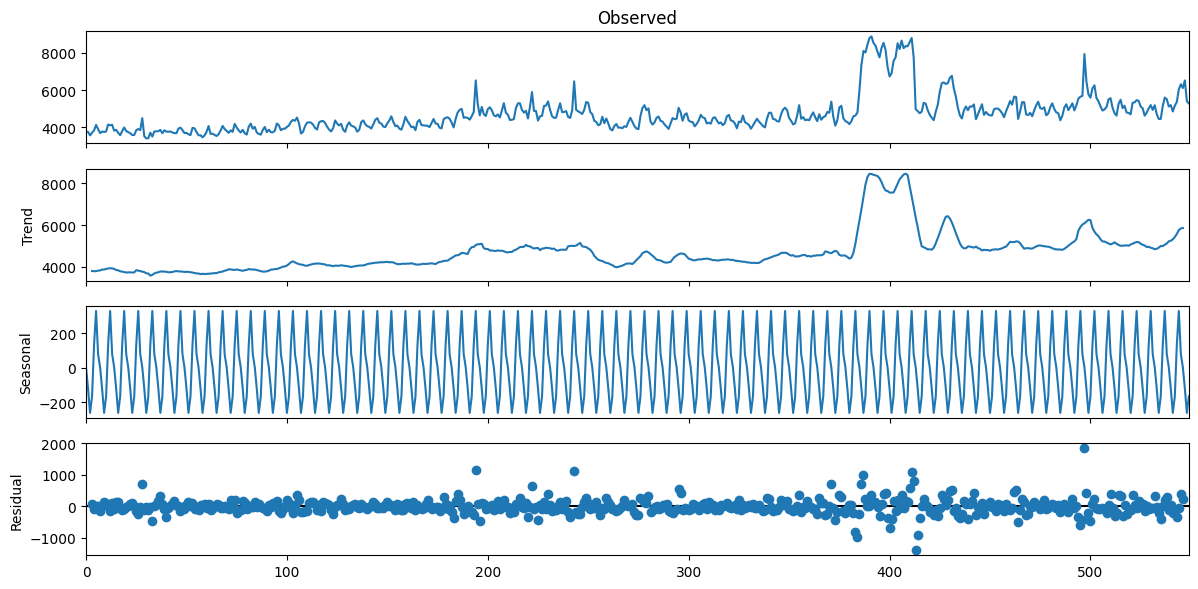

In [ ]:
# decomposition of time series into trend, seasonality and residual with a seasonality of 7(weekly)

decomposition = seasonal_decompose(ts_english, model='additive', period=7)

fig = decomposition.plot()
fig.set_size_inches((12,6))
fig.tight_layout()
plt.show()

In [ ]:
# dickey fuller test to check for residual stationarity

residual = pd.DataFrame(decomposition.resid).fillna(0)[0].values
adf_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.152195e+01
p-value                        4.020092e-21
No of Lags Used                1.700000e+01
Number of Observations Used    5.320000e+02
Critical Value (1%)           -3.442702e+00
Critical Value (5%)           -2.866988e+00
Critical Value (10%)          -2.569672e+00
dtype: float64


**The p-value of residual is less than 5%, so we reject the null hypothesis and conclude that the residuals from Time Series decomposition are stationary.**

# Interpreting ACF & PACF plots and estimating p,q and d.

In [ ]:
 # compute the first-order difference of time series and dropping the NaN values

ts_diff = pd.DataFrame(ts_english).diff(1)
ts_diff.dropna(inplace = True)

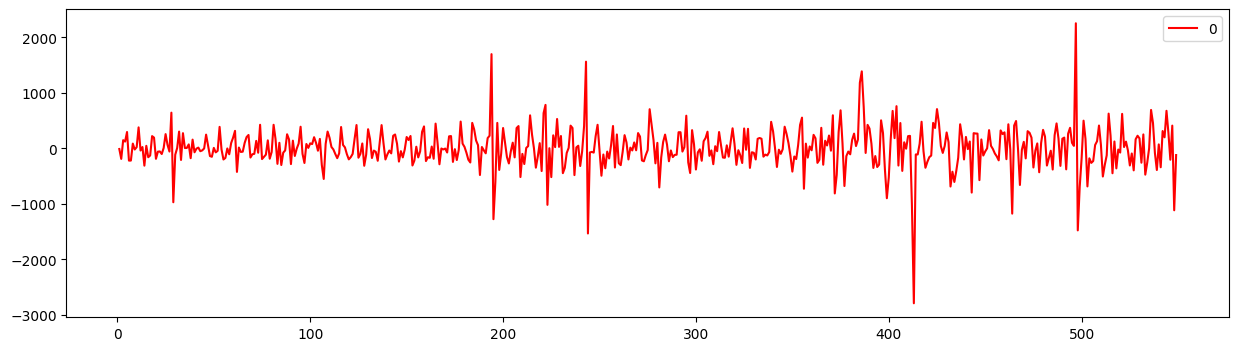

In [ ]:
# plotting the graph

ts_diff.plot(color = 'red', figsize=(15, 4))
plt.show()

In [ ]:
# DF test for ts_diff

adf_test(ts_diff)

Results of Dickey-Fuller Test:
Test Statistic                -8.273590e+00
p-value                        4.721272e-13
No of Lags Used                1.300000e+01
Number of Observations Used    5.350000e+02
Critical Value (1%)           -3.442632e+00
Critical Value (5%)           -2.866957e+00
Critical Value (10%)          -2.569655e+00
dtype: float64


**The p-value is less than 5%, so we reject the null hypothesis and conclude that after differencing once, the time series become stationary.**

**Thus, we can set the values of d as 1.**

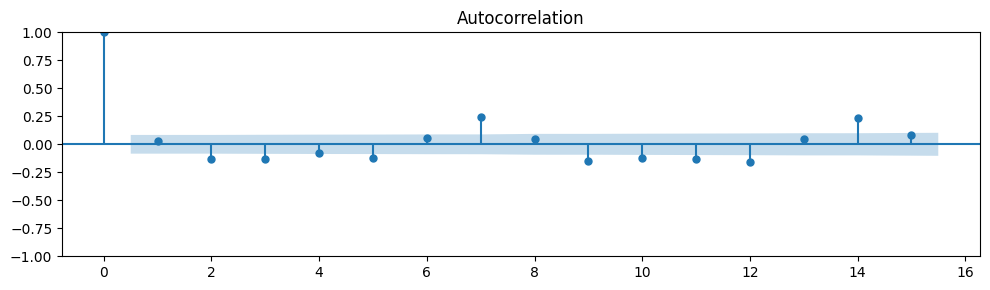

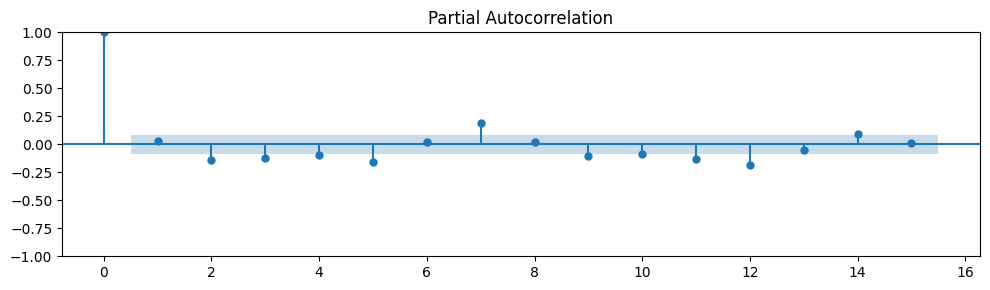

In [ ]:
# creating acf and pacf plots

acf = plot_acf(ts_diff, lags= 15)
acf.set_size_inches((10,3))
acf.tight_layout()
pacf = plot_pacf(ts_diff, lags= 15)
pacf.set_size_inches((10,3))
pacf.tight_layout()

**We will choose with p=1 & q=1 for base ARIMA Model**

# Model Creation & Forecasting

**ARIMA Model**

In [ ]:
# creating an ARIMA model with order(1,1,1)

n = 30
time_series = data_language.English.copy(deep = True)

model = ARIMA(time_series[:-n], order =(1,1,1))
model_fit = model.fit()

forecast = model_fit.forecast(steps = n, alpha = 0.05)

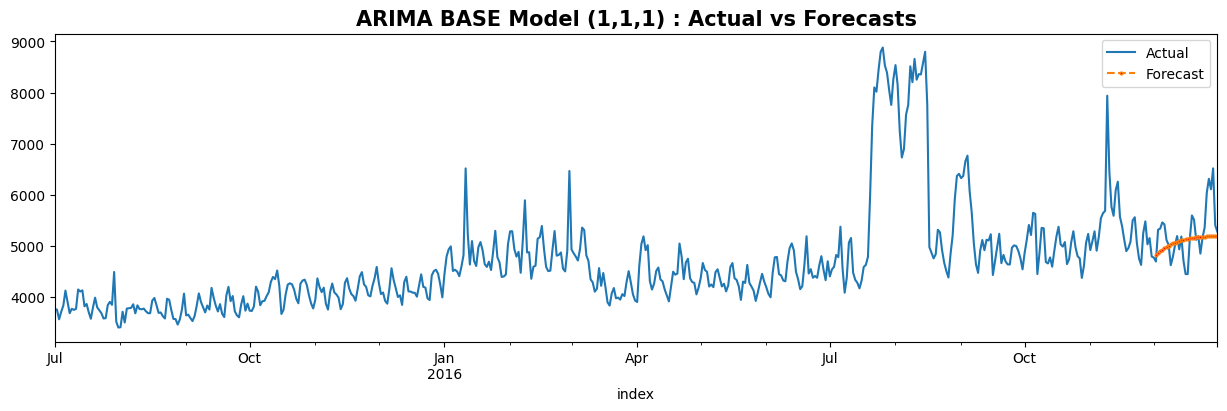

In [ ]:
#plotting Actual & Forecasted values

time_series.index = time_series.index.astype('datetime64[ns]')
forecast.index = forecast.index.astype('datetime64[ns]')

plt.figure(figsize = (15,4))
time_series.plot(label = 'Actual')
forecast.plot(label = 'Forecast', linestyle='dashed', marker='o',markerfacecolor='red', markersize=2)
plt.legend(loc="upper right")
plt.title('ARIMA BASE Model (1,1,1) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
plt.show()


In [ ]:
#Calculating MAPE & RMSE of the model

actuals = time_series.values[-n:]
errors = time_series.values[-n:] - forecast.values

mape = np.mean(np.abs(errors)/ np.abs(actuals))
rmse = np.sqrt(np.mean(errors**2))

print(f'MAPE of Model : {np.round(mape,5)}')

print(f'RMSE of Model : {np.round(rmse,3)}')

MAPE of Model : 0.06691
RMSE of Model : 496.72


**The MAPE of the ARMIA base model of order(1,1,1) is around 6%.**

**The RMSE of the model is around 496.72**

**SARIMAX Model**

In [ ]:
#Creating SARIMAX Model with order(p,d,q) & seasonal_order(P, D, Q, s)

def sarimax_model(time_series, n, p=0, d=0, q=0, P=0, D=0, Q=0, s=0, exog = []):

    model = SARIMAX(time_series[:-n], \
                    order =(p,d,q),
                    seasonal_order=(P, D, Q, s),
                    exog = exog[:-n],
                    initialization='approximate_diffuse')
    model_fit = model.fit()

    model_forecast = model_fit.forecast(n, dynamic = True, exog = pd.DataFrame(exog[-n:]))


    #plotting Actual & Forecasted values

    time_series.index = time_series.index.astype('datetime64[ns]')
    model_forecast.index = model_forecast.index.astype('datetime64[ns]')
    plt.figure(figsize = (15,4))
    time_series[-60:].plot(label = 'Actual')
    model_forecast[-60:].plot(label = 'Forecast', color = 'red',
                              linestyle='dashed', marker='o',markerfacecolor='blue', markersize=5)
    plt.legend(loc="upper right")
    plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
    plt.show()


    #Calculating MAPE & RMSE of the model

    actuals = time_series.values[-n:]
    errors = time_series.values[-n:] - model_forecast.values

    mape = np.mean(np.abs(errors)/ np.abs(actuals))
    rmse = np.sqrt(np.mean(errors**2))

    print(f'MAPE of Model : {np.round(mape,5)}')

    print(f'RMSE of Model : {np.round(rmse,3)}')


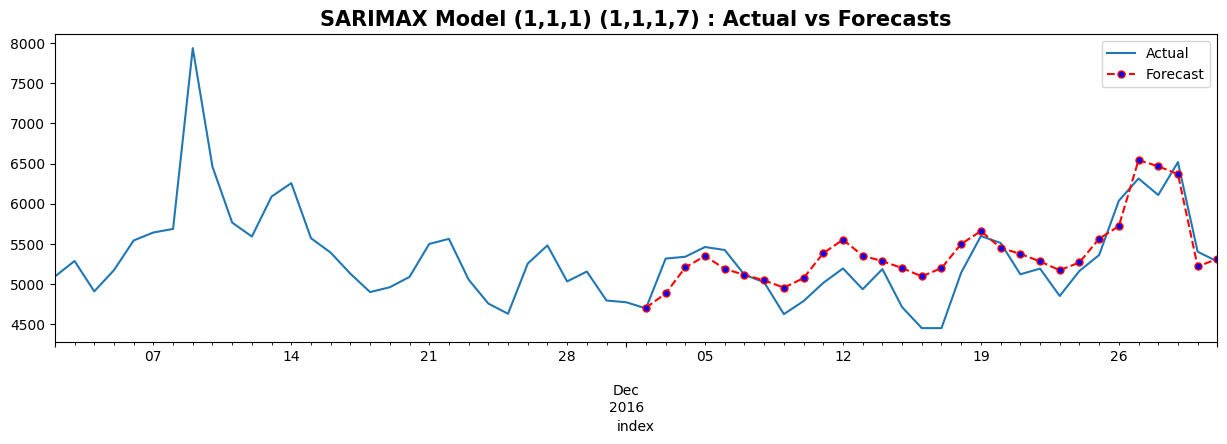

MAPE of Model : 0.04884
RMSE of Model : 307.151


In [ ]:
# implementing SARIMAX model with seasonality (p,d,q,P,D,Q,s = 1,1,1,1,1,1,7)

exog = exog['Exog'].to_numpy()
time_series = data_language.English
test_size= 0.1
p,d,q, P,D,Q,s = 1,1,1,1,1,1,7
n = 30
sarimax_model(time_series, n, p=p, d=d, q=q, P=P, D=D, Q=Q, s=s, exog = exog)

**Using SARIMAX Model we are getting a MAPE of 4% and RMSE score as 307.15**

# Searching Best Parameters for SARIMAX model


In [ ]:
def sarimax_grid_search(time_series, n, param, d_param, s_param, exog = []):
    counter = 0
    #creating df for storing results summary
    param_df = pd.DataFrame(columns = ['serial','pdq', 'PDQs', 'mape', 'rmse'])

    #Creating loop for every paramater to fit SARIMAX model
    for p in param:
        for d in d_param:
            for q in param:
                for P in param:
                    for D in d_param:
                        for Q in param:
                            for s in s_param:
                                #Creating Model
                                model = SARIMAX(time_series[:-n],
                                                order=(p,d,q),
                                                seasonal_order=(P, D, Q, s),
                                                exog = exog[:-n],
                                                initialization='approximate_diffuse')
                                model_fit = model.fit()

                                #Creating forecast from Model
                                model_forecast = model_fit.forecast(n, dynamic = True, exog = pd.DataFrame(exog[-n:]))

                                #Calculating errors for results
                                actuals = time_series.values[-n:]
                                errors = time_series.values[-n:] - model_forecast.values

                                #Calculating MAPE & RMSE
                                mape = np.mean(np.abs(errors)/ np.abs(actuals))
                                rmse = np.sqrt(np.mean(errors**2))
                                mape = np.round(mape,5)
                                rmse = np.round(rmse,3)

                                #Storing the results in param_df
                                counter += 1
                                list_row = [counter, (p,d,q), (P,D,Q,s), mape, rmse]
                                param_df.loc[len(param_df)] = list_row

                # #print statement to check progress of Loop
                # print(f'Possible Combination: {counter} out of { (len(param)**4)*len(s_param)*(len(d_param)**2)} calculated')

    return param_df

In [ ]:
 #Finding best parameters for English time series

if not isinstance(exog, np.ndarray):
    exog = exog.to_numpy()
time_series = data_language.English
n = 30
param = [0,1,2]
d_param = [0,1]
s_param = [7]

english_params  = sarimax_grid_search(time_series, n, param, d_param,s_param, exog)

In [ ]:
english_params.sort_values(['mape', 'rmse']).head()

,serial,pdq,PDQs,mape,rmse
208,209,"(1, 1, 2)","(1, 1, 1, 7)",0.04185,267.902
196,197,"(1, 1, 1)","(2, 1, 1, 7)",0.04202,274.168
322,323,"(2, 1, 2)","(2, 1, 1, 7)",0.04235,270.032
239,240,"(2, 0, 1)","(0, 1, 2, 7)",0.04251,270.776
41,42,"(0, 0, 2)","(0, 1, 2, 7)",0.04325,287.492


**The best parameters for English Time Series are pdq(1, 1, 2) & PDQs(1, 1, 1, 7)**

**Also, Minimum MAPE is 4.189% and corresponding minimum RMSE is 272.188.**

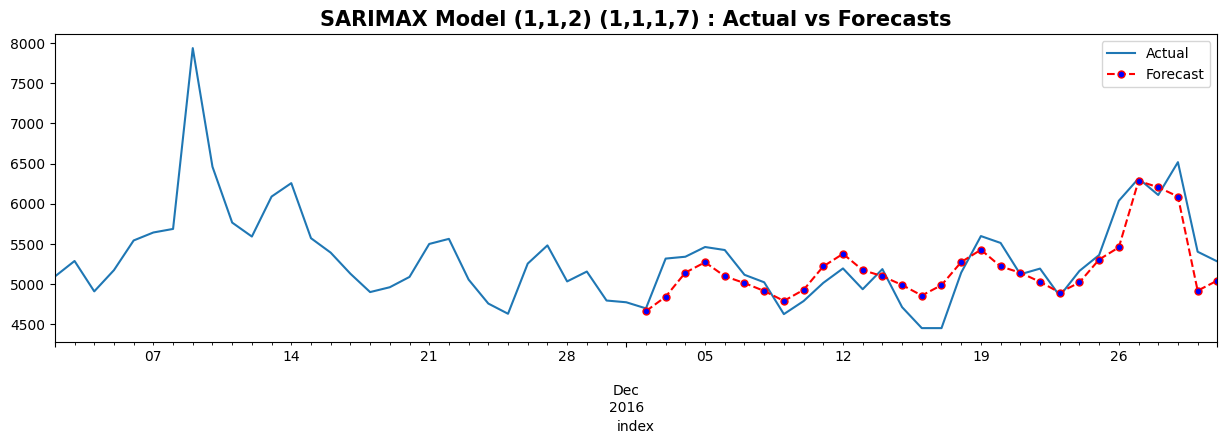

MAPE of Model : 0.04185
RMSE of Model : 267.902


In [ ]:
#Plotting the SARIMAX model corresponding to best parameters

if not isinstance(exog, np.ndarray):
    exog = exog.to_numpy()
time_series = data_language.English
p,d,q, P,D,Q,s = 1,1,2, 1,1,1,7
n = 30
sarimax_model(time_series, n, p=p, d=d, q=q, P=P, D=D, Q=Q, s=s, exog = exog)

**Best MAPE is 4.1% and the best RMSE score is 267.9 after searching for the best parameters.**

# Pipeline to search best parameters for all Language

In [ ]:
# Function to find best parameters for each language

def pipeline_sarimax_grid_search_without_exog(languages, data_language, n, param, d_param, s_param):

    best_param_df  = pd.DataFrame(columns = ['language','p','d', 'q', 'P','D','Q','s','mape'])
    for lang in languages:
        print('')
        print('')
        print(f'--------------------------------------------------------------')
        print(f'          Finding best parameters for {lang}                  ')
        print(f'--------------------------------------------------------------')
        counter = 0
        time_series = data_language[lang]
        #creating df for storing results summary
        #param_df = pd.DataFrame(columns = ['serial','pdq', 'PDQs', 'mape', 'rmse'])
        best_mape = 100

        #Creating loop for every paramater to fit SARIMAX model
        for p in param:
            for d in d_param:
                for q in param:
                    for P in param:
                        for D in d_param:
                            for Q in param:
                                for s in s_param:
                                    #Creating Model
                                    model = SARIMAX(time_series[:-n],
                                                    order=(p,d,q),
                                                    seasonal_order=(P, D, Q, s),
                                                    initialization='approximate_diffuse')
                                    model_fit = model.fit()

                                    #Creating forecast from Model
                                    model_forecast = model_fit.forecast(n, dynamic = True)

                                    #Calculating errors for results
                                    actuals = time_series.values[-n:]
                                    errors = time_series.values[-n:] - model_forecast.values

                                    #Calculating MAPE & RMSE
                                    mape = np.mean(np.abs(errors)/ np.abs(actuals))

                                    counter += 1

                                    if (mape < best_mape):
                                        best_mape = mape
                                        best_p = p
                                        best_d = d
                                        best_q = q
                                        best_P = P
                                        best_D = D
                                        best_Q = Q
                                        best_s = s
                                    else: pass

                    #print statement to check progress of Loop
                    print(f'Possible Combination: {counter} out of {(len(param)**4)*len(s_param)*(len(d_param)**2)} calculated')

        best_mape = np.round(best_mape, 5)
        print(f'--------------------------------------------------------------')
        print(f'Minimum MAPE for {lang} = {best_mape}')
        print(f'Corresponding Best Parameters are {best_p , best_d, best_q, best_P, best_D, best_Q, best_s}')
        print(f'--------------------------------------------------------------')

        best_param_row = [lang, best_p, best_d, best_q, best_P, best_D, best_Q, best_s, best_mape]
        best_param_df.loc[len(best_param_df)] = best_param_row

    return best_param_df

In [ ]:
# finding best parameters for all languages

languages = ['Chinese', 'French', 'German', 'Japenese', 'Russian', 'Spanish']
n = 30
param = [0,1,2]
d_param = [0,1]
s_param = [7]


best_param_df = pipeline_sarimax_grid_search_without_exog(languages, data_language, n, param, d_param, s_param)



--------------------------------------------------------------
          Finding best parameters for Chinese                  
--------------------------------------------------------------
Possible Combination: 18 out of 324 calculated
Possible Combination: 36 out of 324 calculated
Possible Combination: 54 out of 324 calculated
Possible Combination: 72 out of 324 calculated
Possible Combination: 90 out of 324 calculated
Possible Combination: 108 out of 324 calculated
Possible Combination: 126 out of 324 calculated
Possible Combination: 144 out of 324 calculated
Possible Combination: 162 out of 324 calculated
Possible Combination: 180 out of 324 calculated
Possible Combination: 198 out of 324 calculated
Possible Combination: 216 out of 324 calculated
Possible Combination: 234 out of 324 calculated
Possible Combination: 252 out of 324 calculated
Possible Combination: 270 out of 324 calculated
Possible Combination: 288 out of 324 calculated
Possible Combination: 306 out of 324 calculat

# Creating SARIMAX model for all Languages

In [ ]:
#Function to create SARIMAX model for each Language

def plot_best_SARIMAX_model(languages, data_language, n, best_param_df):

    for lang in languages:

        #fetching best parameters for each language
        p = best_param_df.loc[best_param_df['language'] == lang, ['p']].values[0][0]
        d = best_param_df.loc[best_param_df['language'] == lang, ['d']].values[0][0]
        q = best_param_df.loc[best_param_df['language'] == lang, ['q']].values[0][0]
        P = best_param_df.loc[best_param_df['language'] == lang, ['P']].values[0][0]
        D = best_param_df.loc[best_param_df['language'] == lang, ['D']].values[0][0]
        Q = best_param_df.loc[best_param_df['language'] == lang, ['Q']].values[0][0]
        s = best_param_df.loc[best_param_df['language'] == lang, ['s']].values[0][0]


        time_series = data_language[lang]

        # Creating SARIMAX Model with order(p,d,q) & seasonal_order(P, D, Q, s)
        model = SARIMAX(time_series[:-n],
                        order =(p,d,q),
                        seasonal_order=(P, D, Q, s),
                        initialization='approximate_diffuse')
        model_fit = model.fit()

        #Creating forecast for last n-values
        model_forecast = model_fit.forecast(n, dynamic = True)

        #Calculating MAPE & RMSE
        actuals = time_series.values[-n:]
        errors = time_series.values[-n:] - model_forecast.values

        mape = np.mean(np.abs(errors)/ np.abs(actuals))
        rmse = np.sqrt(np.mean(errors**2))

        print('')
        print('')
        print(f'-----------------------------------------------------------------------------------------')
        print(f'        SARIMAX model for {lang} Time Series                                             ')
        print(f'        Parameters of Model : ({p},{d},{q}) ({P},{D},{Q},{s})                            ')
        print(f'        MAPE of Model       : {np.round(mape,5)}                                         ')
        print(f'        RMSE of Model       : {np.round(rmse,3)}                                         ')
        print(f'-----------------------------------------------------------------------------------------')

        # plotting Actual & Forecasted values

        time_series.index = time_series.index.astype('datetime64[ns]')
        model_forecast.index = model_forecast.index.astype('datetime64[ns]')
        plt.figure(figsize = (20,8))
        time_series[-60:].plot(label = 'Actual')
        model_forecast[-60:].plot(label = 'Forecast', color = 'red',
                                  linestyle='dashed', marker='o',markerfacecolor='green', markersize=5)
        plt.legend(loc="upper right")
        plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts for {lang} language', fontsize = 15, fontweight = 'bold')
        plt.show()

    return 0



-----------------------------------------------------------------------------------------
        SARIMAX model for Chinese Time Series                                             
        Parameters of Model : (0,1,1) (0,0,2,7)                            
        MAPE of Model       : 0.03352                                         
        RMSE of Model       : 16.433                                         
-----------------------------------------------------------------------------------------


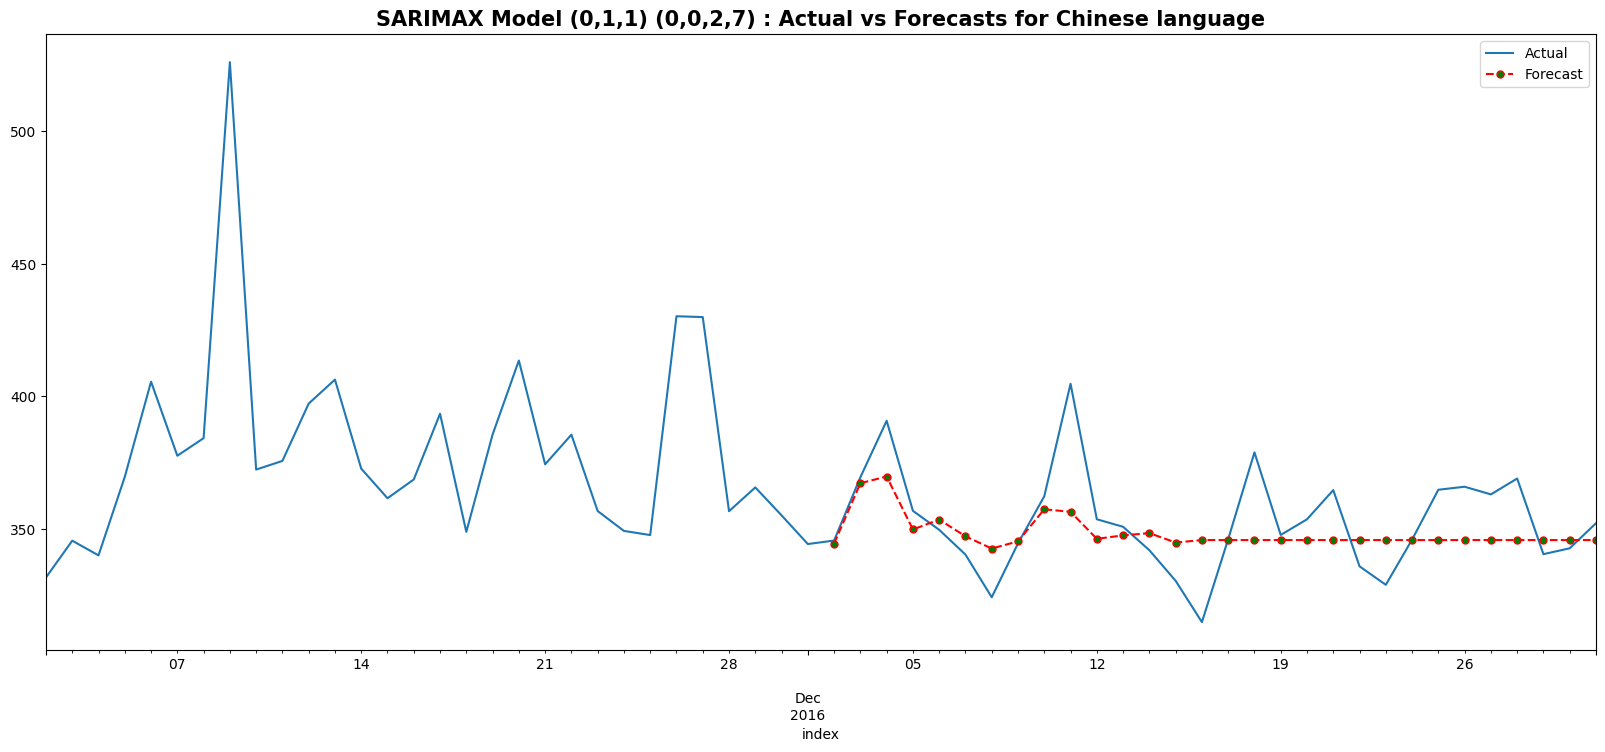



-----------------------------------------------------------------------------------------
        SARIMAX model for French Time Series                                             
        Parameters of Model : (0,0,2) (2,1,2,7)                            
        MAPE of Model       : 0.05989                                         
        RMSE of Model       : 62.201                                         
-----------------------------------------------------------------------------------------


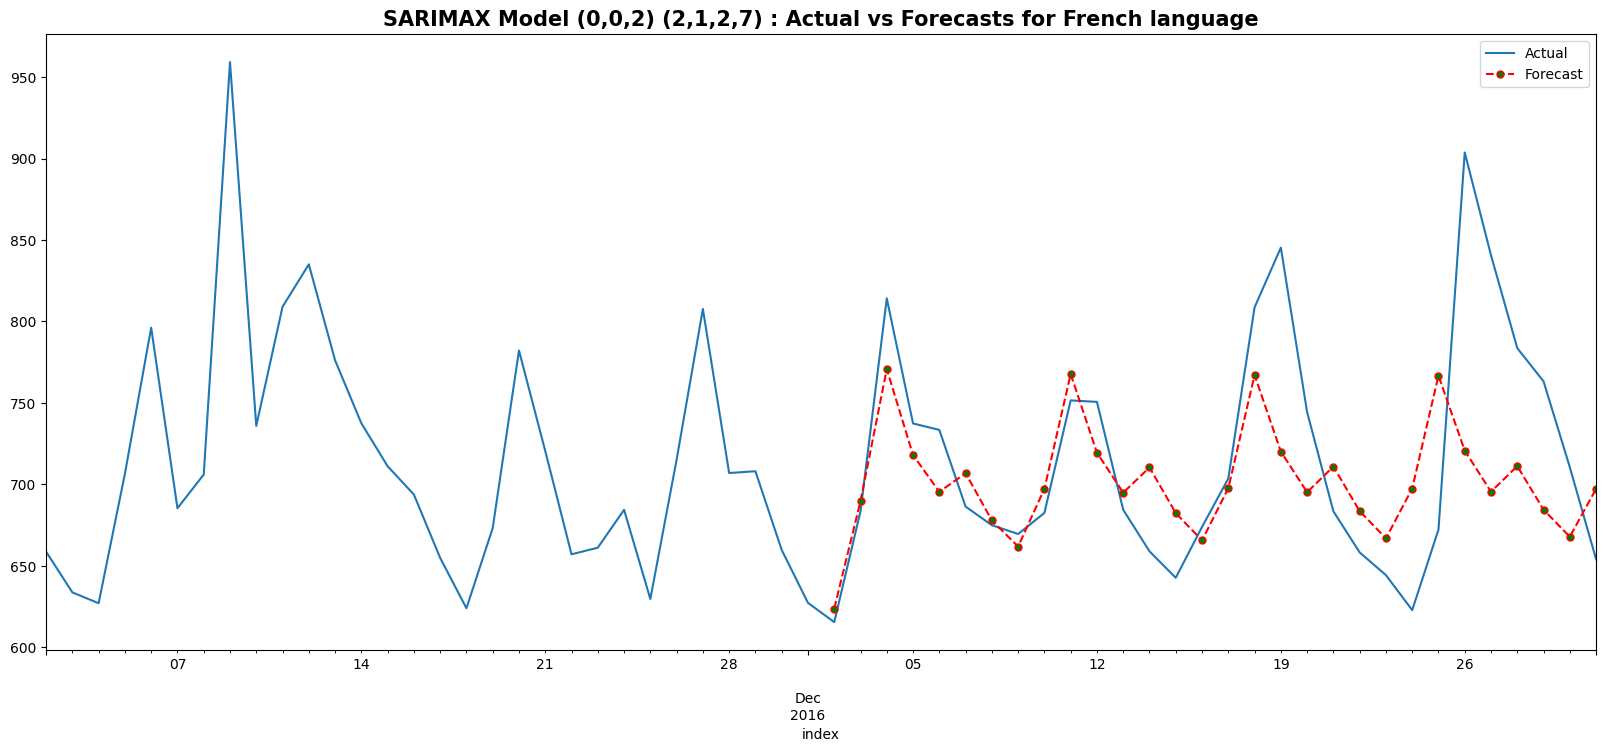



-----------------------------------------------------------------------------------------
        SARIMAX model for German Time Series                                             
        Parameters of Model : (2,1,0) (0,1,1,7)                            
        MAPE of Model       : 0.06553                                         
        RMSE of Model       : 112.628                                         
-----------------------------------------------------------------------------------------


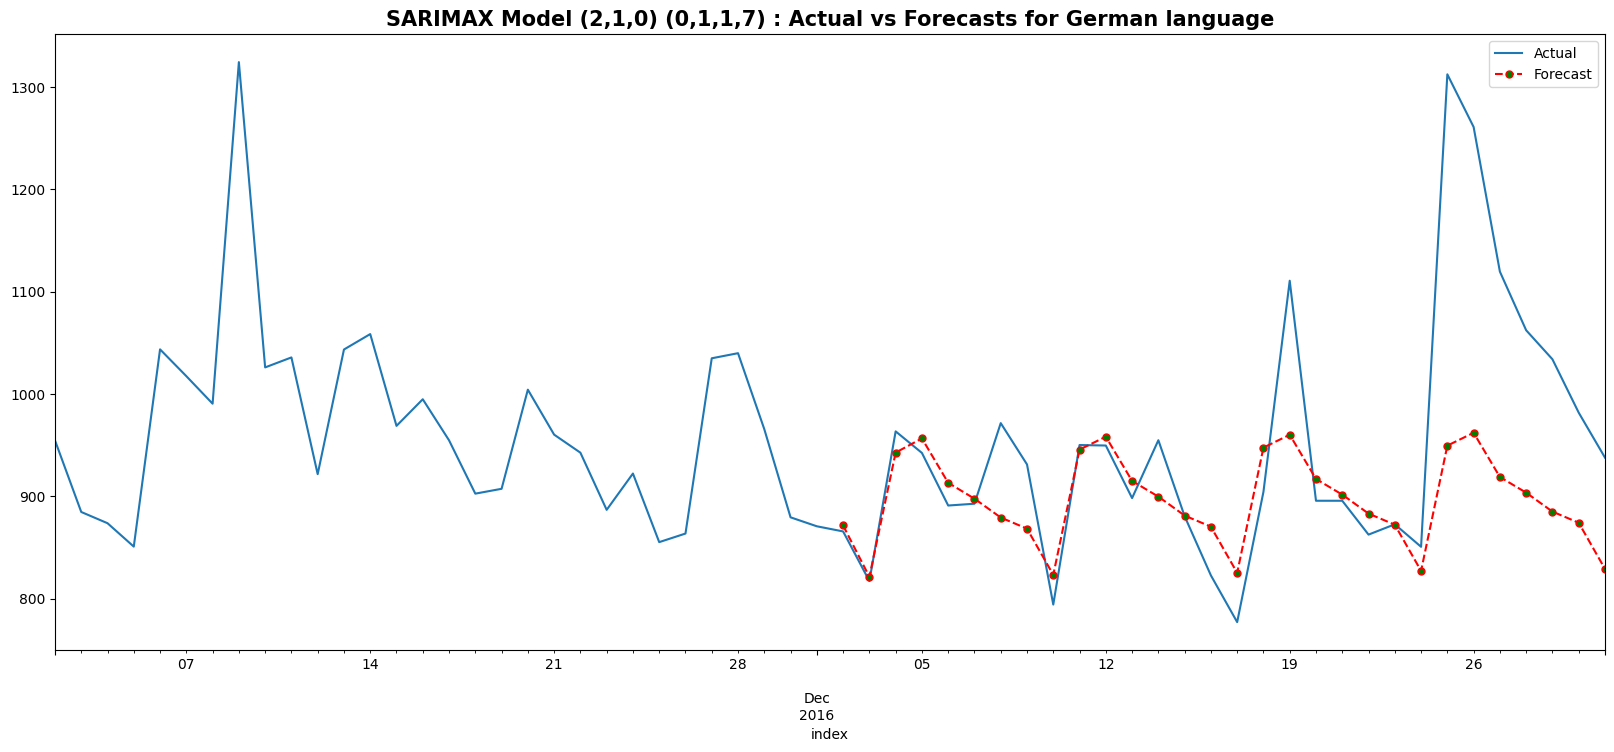



-----------------------------------------------------------------------------------------
        SARIMAX model for Japenese Time Series                                             
        Parameters of Model : (0,0,2) (2,0,2,7)                            
        MAPE of Model       : 0.07278                                         
        RMSE of Model       : 107.134                                         
-----------------------------------------------------------------------------------------


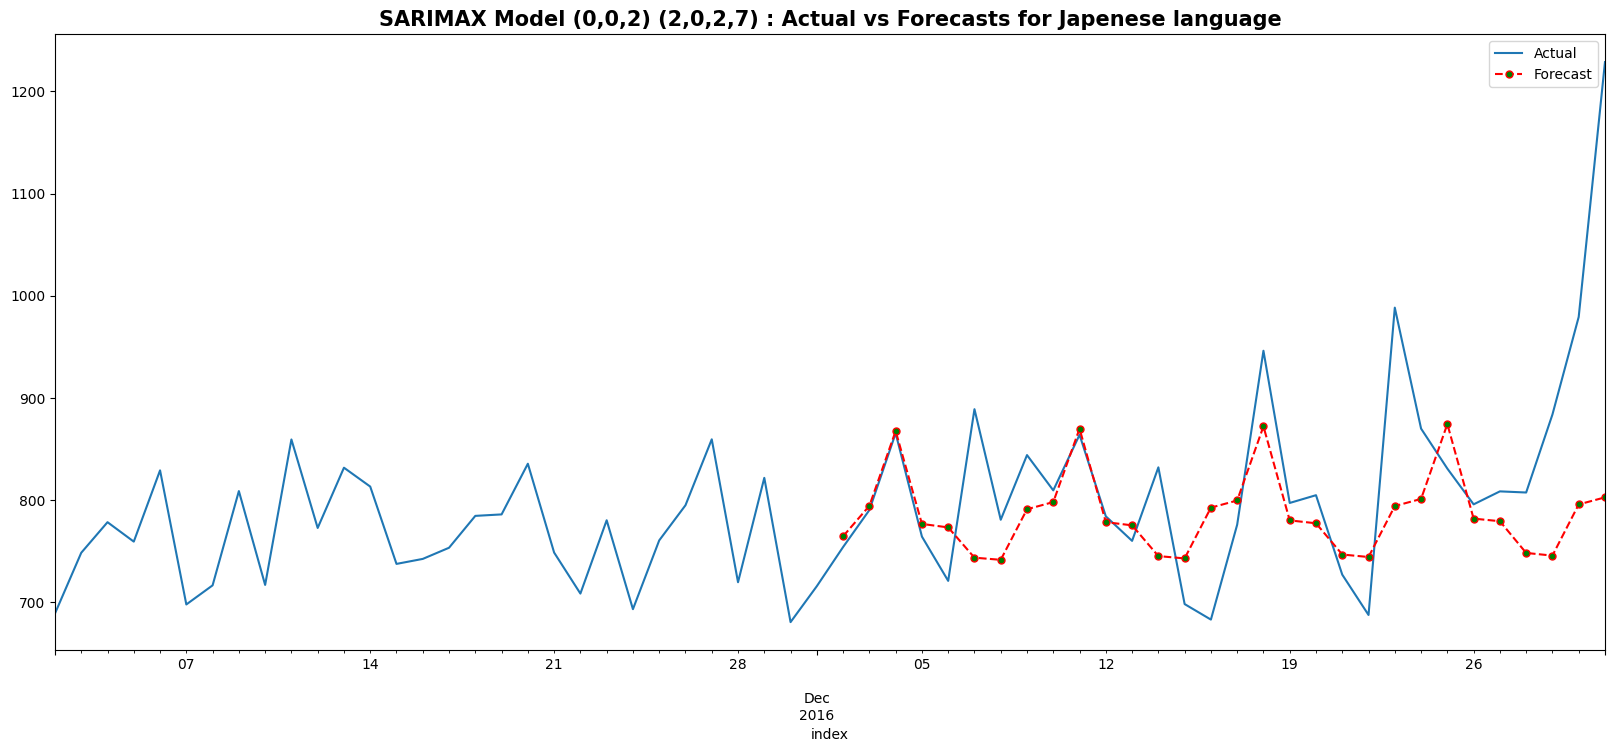



-----------------------------------------------------------------------------------------
        SARIMAX model for Russian Time Series                                             
        Parameters of Model : (0,0,0) (1,0,1,7)                            
        MAPE of Model       : 0.05342                                         
        RMSE of Model       : 74.078                                         
-----------------------------------------------------------------------------------------


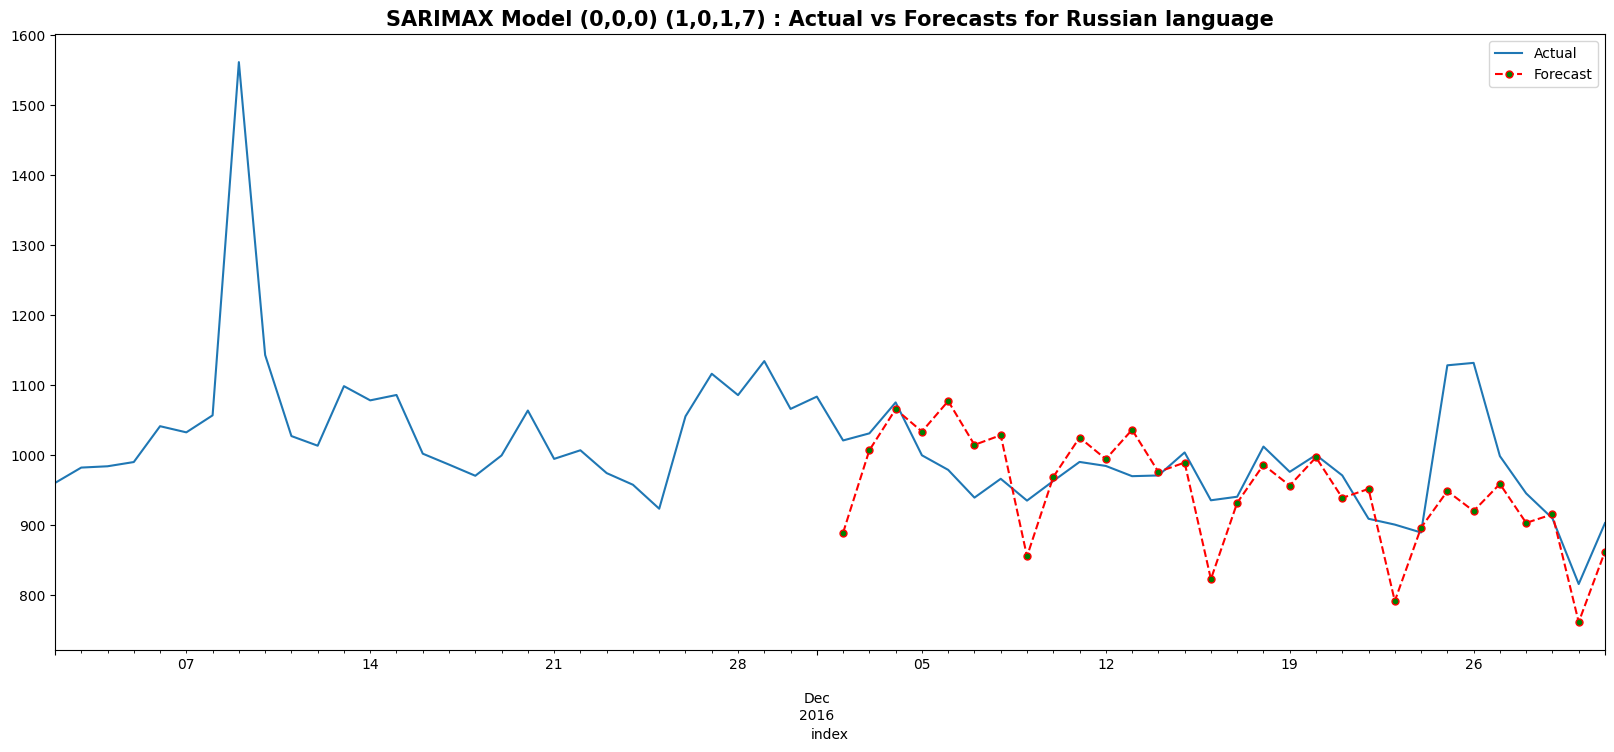



-----------------------------------------------------------------------------------------
        SARIMAX model for Spanish Time Series                                             
        Parameters of Model : (0,1,0) (2,1,0,7)                            
        MAPE of Model       : 0.08209                                         
        RMSE of Model       : 100.474                                         
-----------------------------------------------------------------------------------------


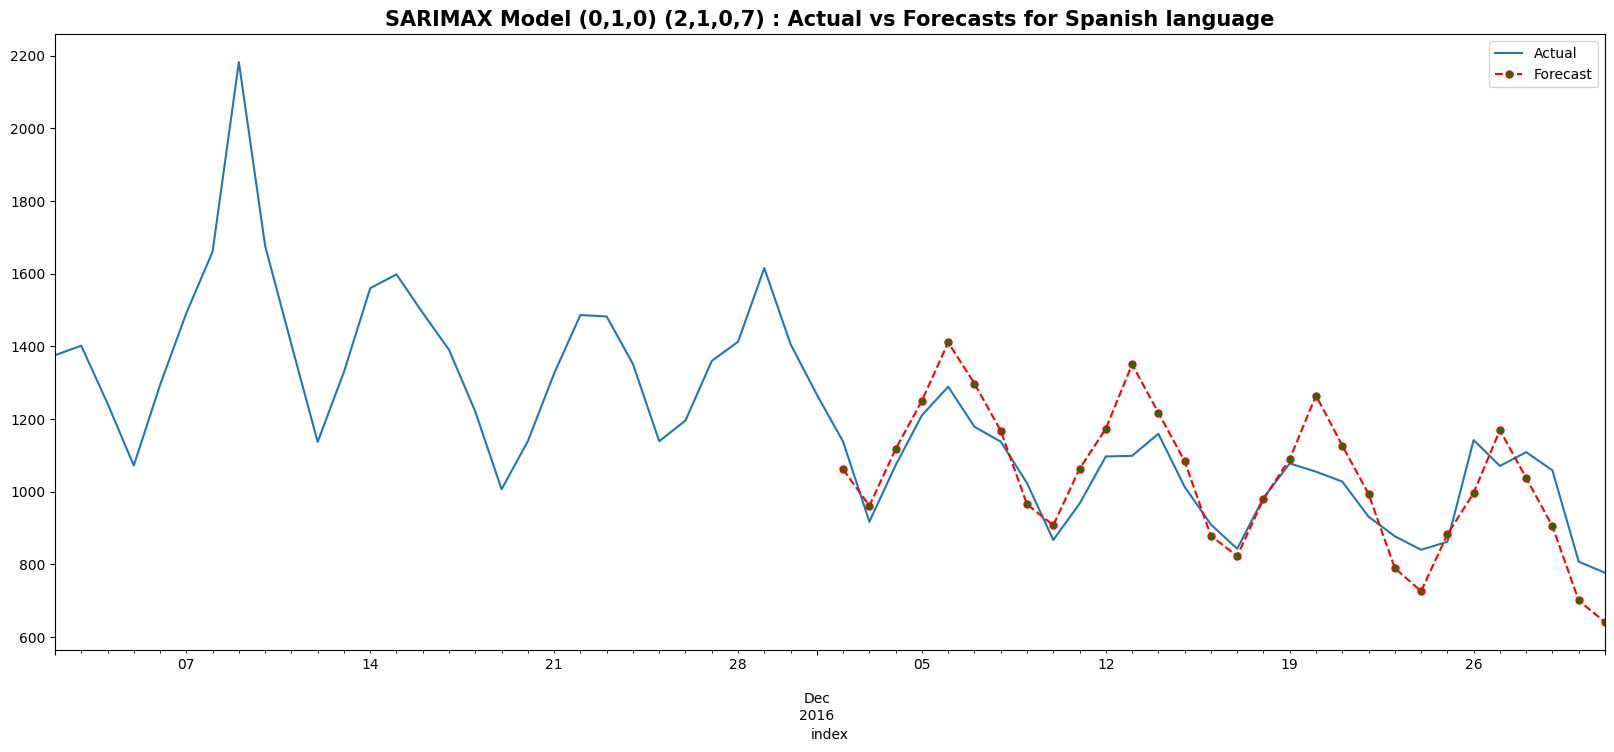

0

In [ ]:
# Plotting SARIMAX model for each Language

languages = ['Chinese', 'French', 'German', 'Japenese', 'Russian', 'Spanish']
n = 30
plot_best_SARIMAX_model(languages, data_language, n, best_param_df)

# Forecast using Facebook Prophet

In [ ]:
!pip install prophet


In [ ]:
from prophet import Prophet

In [ ]:
time_series = data_language
time_series = time_series.reset_index()
time_series = time_series[['index', 'English']]
time_series.columns = ['ds', 'y']
import copy
exog = copy.deepcopy(exog)
time_series['exog'] = exog.tolist()

In [ ]:
time_series

,ds,y,exog
0,2015-07-01,3767.328604,0
1,2015-07-02,3755.158765,0
2,2015-07-03,3565.225696,0
3,2015-07-04,3711.782932,0
4,2015-07-05,3833.433025,0
...,...,...,...
545,2016-12-27,6314.335275,1
546,2016-12-28,6108.874144,1
547,2016-12-29,6518.058525,1
548,2016-12-30,5401.792360,0


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2o0aw809/i5zggetj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2o0aw809/eryfxy9q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17664', 'data', 'file=/tmp/tmp2o0aw809/i5zggetj.json', 'init=/tmp/tmp2o0aw809/eryfxy9q.json', 'output', 'file=/tmp/tmp2o0aw809/prophet_modeloaowt3d0/prophet_model-20240525181448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:14:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:14:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


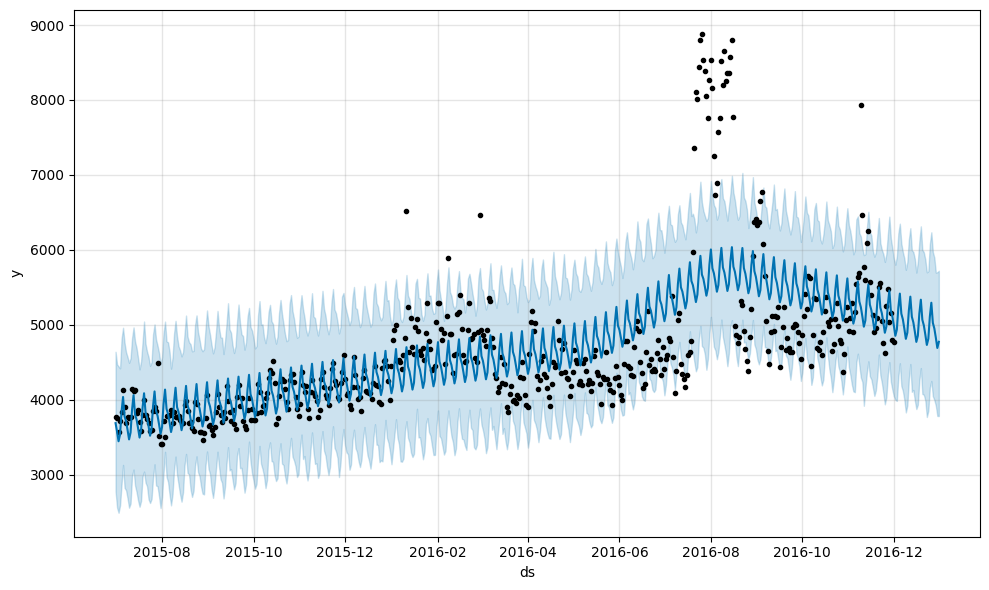

In [ ]:
# prediction using prophet

prophet1 = Prophet(weekly_seasonality=True)
prophet1.fit(time_series[['ds', 'y']][:-30])
future = prophet1.make_future_dataframe(periods=30, freq= 'D')
forecast = prophet1.predict(future)
fig1 = prophet1.plot(forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2o0aw809/c5dc1fs4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2o0aw809/tc3thnkh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88152', 'data', 'file=/tmp/tmp2o0aw809/c5dc1fs4.json', 'init=/tmp/tmp2o0aw809/tc3thnkh.json', 'output', 'file=/tmp/tmp2o0aw809/prophet_modelvmij7obc/prophet_model-20240525181449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:14:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:14:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


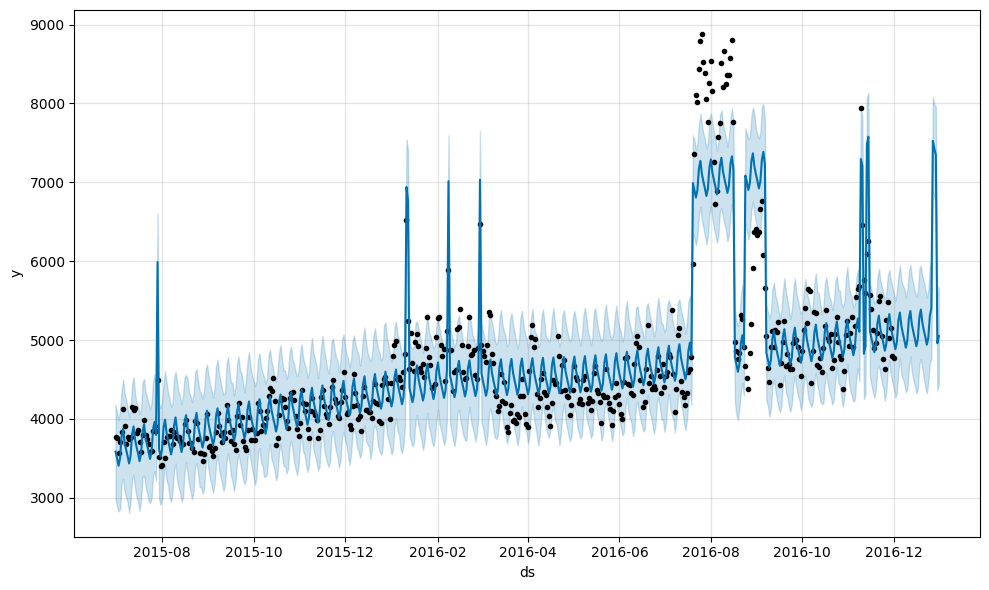

In [ ]:
prophet2 = Prophet(weekly_seasonality=True)
prophet2.add_regressor('exog')
prophet2.fit(time_series[:-30])
#future2 = prophet2.make_future_dataframe(periods=30, freq= 'D')
forecast2 = prophet2.predict(time_series)
fig2 = prophet2.plot(forecast2)

Text(0.5, 1.0, 'Prophet Model 02 (With Exogenous variable) : Actual vs Forecasts')

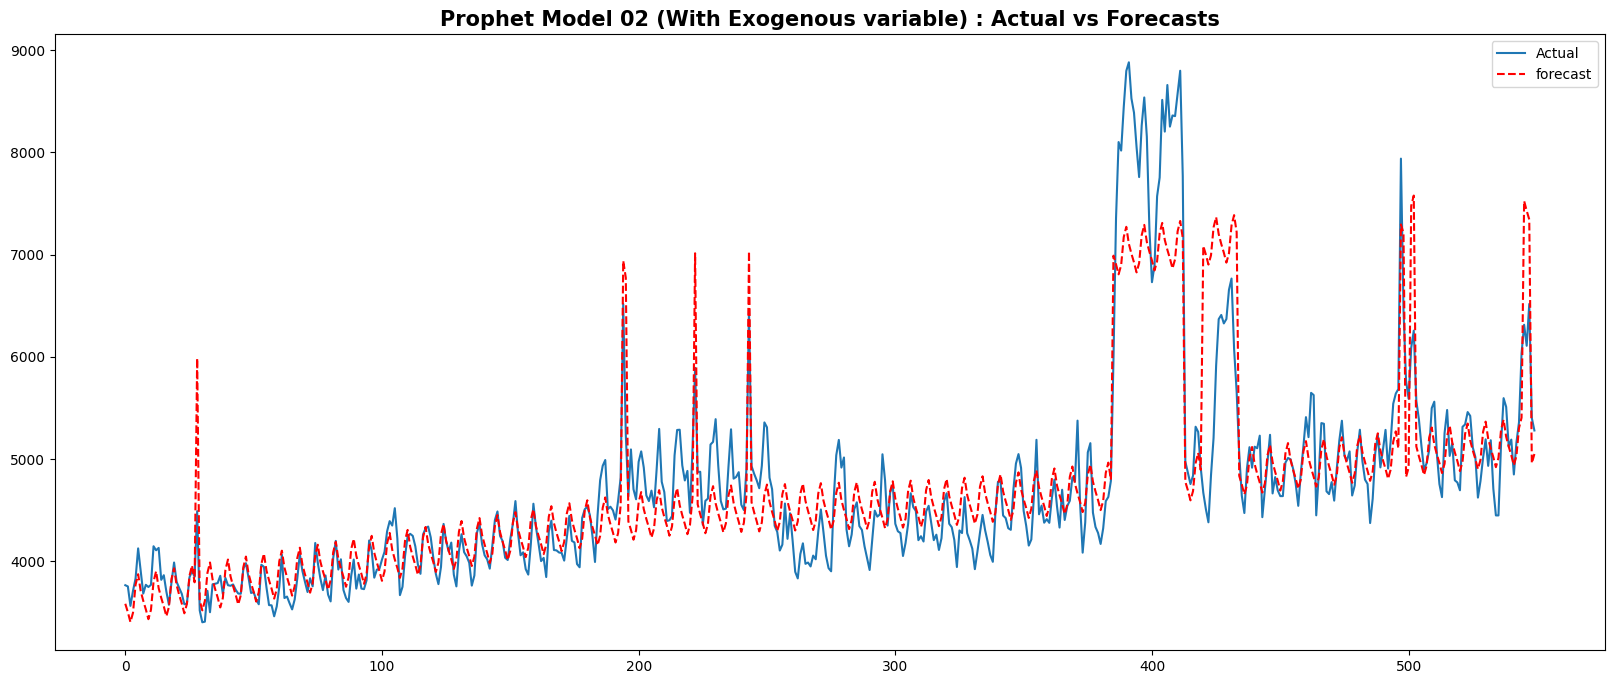

In [ ]:
#

actual = time_series['y'].values
forecast = forecast2['yhat'].values

plt.figure(figsize = (20,8))
plt.plot(actual, label = 'Actual')
plt.plot(forecast, label = 'forecast', color = 'red', linestyle='dashed')
plt.legend(loc="upper right")
plt.title(f'Prophet Model 02 (With Exogenous variable) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')

In [ ]:
# mape calculation for prophet

errors = abs(actual - forecast)
mape = np.mean(errors/abs(actual))
mape

0.059768080739909364

# Insights & Recommendations

# INSIGHTS

**The highest number of webpages are in English followed by Japanese, German and French.**

**The maximum number of access type is all-access.**

**Mobile-access is a bit more than desktop-access type.**

**Spider has 24.2% of all Access Origin.**

**Rest have all-agent Access Origin.**

**The most visited pages are in English followed by Spanish, Russian and German.**

**The number of page visits is maximum in English. It is roughly uniform with a spike in between.**

**The MAPE of the ARMIA base model of order(1,1,1) is around 6%.**

**The RMSE of the ARIMA model is around 496.72**

**Best MAPE of SARIMAX is 4.1% and the best RMSE score is 267.9 after searching for the best parameters.**

**The MAPE of Prophet model is around 6%.**




# RECOMMENDATIONS

**1.English language has a high mean visit and low MAPE, so we can conclude that the webpages most viewed is in English.**

**Recommendation:**

Allocate maximum advertisement budget to English pages due to their high potential for conversion. Since the MAPE is low, it indicates that the forecasting accuracy is high, making it a reliable choice for advertisement investment.

**2.Chinese Language has the lowest number of visits.**

**Recommendation:**

Unless there's a specific marketing strategy targeting Chinese populations, it's advisable to minimize advertisement expenditure on Chinese pages. Consider redirecting resources to languages with higher conversion potential.

**3.Russian Language has decent number of visits and low MAPE.**

**Recommendation:**
 Utilize Russian language pages effectively for advertisement. With a combination of good traffic and low forecasting error, there's potential for high conversion rates if the advertisements are well-targeted to the Russian-speaking audience.

**4.Spanish Language has second highest of visits but has highest MAPE.**

**Recommendation:**

 While Spanish pages attract a significant audience, the high MAPE suggests that there might be discrepancies between predicted and actual visits, potentially affecting advertisement performance. It's essential to optimize targeting strategies and monitor performance closely to ensure advertisements effectively reach the intended audience.

**5.French, German, and Japanese Languages Medium level of visits and medium MAPE levels.**

**Recommendation:**

 Depending on the target customers, advertisement strategies should be tailored to these languages. While they may not have the highest traffic or the lowest forecasting error, they still represent valuable opportunities for reaching specific demographics. Consider segmenting advertisements based on cultural and linguistic preferences to maximize conversion.

#QUESTIONNAIRE

**1. Defining the problem statements and where can this and modifications of this be used?**

As part of the Data Science team at Ad Ease, our goal is to analyze per-page view reports for various Wikipedia pages spanning 550 days. Our objective is to forecast the number of views to facilitate optimized ad placement for our clients. With a dataset comprising 145,000 Wikipedia pages and their daily view counts, we aim to provide insights tailored to our clients' diverse regions and linguistic preferences.

Developing an accurate forecasting model is essential to anticipate fluctuations in page visits, empowering our business team to optimize marketing expenditure. By effectively predicting days with higher visitation rates, our clients can strategically allocate ad placements, ensuring maximum audience reach while optimizing spending.

**2. Write 3 inferences you made from the data visualizations.**


Based on the provided data, we've identified seven languages. English boasts the highest number of pages, followed by Japanese, German, and French.

Regarding access types, there are three categories: All-access (51.4%), mobile-web (24.9%), and desktop (23.6%).

Access origins are classified into two groups: all-agents (75.8%) and spider (24.2%).

English emerges as the clear leader, with maximum advertisement potential due to its high mean visits and low MAPE.

Chinese experiences the lowest number of visits, suggesting a cautious approach to advertisements unless there's a specific marketing strategy targeting Chinese demographics.

Russian pages demonstrate a decent number of visits alongside a low MAPE, indicating significant potential for maximizing conversion rates if utilized effectively.

While Spanish records the second highest number of visits, its high MAPE raises concerns about advertisement reach to the intended audience.

French, German, and Japanese exhibit moderate visitation levels and medium MAPE levels, warranting tailored advertisement strategies based on target customer preferences.


**3.	What does the decomposition of series do?**


Time series decomposition is a statistical procedure that breaks down a time series into various components, each representing distinct underlying patterns or categories.

There are primarily two types of decomposition: Additive and Multiplicative.

For our current business case, we have opted for the Additive Model to decompose the time series. In the additive model, individual components such as trend, seasonality, and residual are combined by addition, as illustrated in the equation below:

$y_{t}$ =  $T_{t}$ +  $S_{t}$  +  $R_{t}$

where
- $y_{t}$ = actual value in time series
- $T_{t}$ = trend in time series
- $S_{t}$ = seasonality in time series
- $R_{t}$ = residuals of time series


**4.	What level of differencing gave you a stationary series?**

 A non-stationary time series can be converted to a stationary time series through a technique called differencing. Differencing series is the change between consecutive data points in the series.

$y'_{t}$ =  $y_{t}$ -  $y_{t-1}$

This is called first order differencing.

- In some cases, just differencing once will still yield a nonstationary time series. In that case a second order differencing is required.

- Seasonal differencing is the change between the same period in two different seasons. Assume a season has period, m

$y'_{t}$ =  $y_{t}$ -  $y_{t-m}$

- Once the time series becomes stationary, no differencing is required.

**5.	Difference between arima, sarima & sarimax.**

ARIMA, SARIMA, and SARIMAX are models utilized for time series forecasting, each possessing distinct capabilities and applicable data types.

- ARIMA (AutoRegressive Integrated Moving Average):

ARIMA is a conventional time series model integrating autoregressive (AR) and moving average (MA) components alongside differencing to address non-stationary data.
It is designed for univariate time series data, where each observation represents a singular value over time.
The model comprises three principal components:

Autoregressive (AR) terms, indicating the correlation between an observation and lagged observations.
Differencing (I) to render the time series stationary by eliminating trend and seasonality.
Moving average (MA) terms, reflecting the correlation between an observation and residual error from a moving average model.

SARIMA (Seasonal ARIMA):

- SARIMA extends the ARIMA model to accommodate seasonal variations within the data.
It introduces supplementary seasonal AR and MA terms to capture seasonal patterns inherent in the time series data.
SARIMA is suited for time series data featuring seasonal patterns recurring at fixed intervals.
Seasonal ARIMA models are represented as SARIMA(p,d,q)(P,D,Q)s, where (p,d,q) denote non-seasonal ARIMA parameters, (P,D,Q) denote seasonal ARIMA parameters, and s denotes the seasonal period.

- SARIMAX (Seasonal ARIMA with Exogenous Variables):

SARIMAX builds upon SARIMA by permitting the inclusion of exogenous variables, which are external factors influencing the time series data but not inherent to the model's internal dynamics.
This allows for the integration of supplementary information or predictors into the model, enhancing forecasting accuracy.
SARIMAX models follow the notation SARIMAX(p,d,q)(P,D,Q)s, with non-seasonal and seasonal parameters akin to SARIMA, alongside additional exogenous variables.

**6.	Compare the number of views in different languages**

 Mean number of views of various languages have the following :

**English > Spanish > Russian > German > Japenese > French > Chinese**

**7.	What other methods other than grid search would be suitable to get the model for all languages?**

- Prior domain/business knowledge or relevant experience can aid in intuitively estimating model parameters.

- ACF and PACF plots of the time series offer a secondary estimation method for determining p, q, and d:

- Conduct an augmented Dickey-Fuller test to assess stationarity.
If stationary, fit an ARMA model; if not, identify the value of d.
For stationary data, analyze the autocorrelation and partial autocorrelation plots:

- Utilize the cutoff point in the PACF plot to determine p.

- Utilize the cutoff point in the ACF plot to determine q.